In [ ]:
import pandas as pd
df = pd.read_csv('metrics.csv', parse_dates= ['time'])

df.sample(10)

,time,name,value
19,2021-07-13 14:37:00.993,mem,2.275083e+08
64,2021-07-13 14:37:23.004,mem,2.275293e+08
77,2021-07-13 14:37:28.746,mem,2.275121e+08
22,2021-07-13 14:37:02.907,cpu,2.962000e+01
54,2021-07-13 14:37:18.219,cpu,3.137000e+01
84,2021-07-13 14:37:32.574,cpu,3.645000e+01
37,2021-07-13 14:37:09.606,mem,2.275374e+08
85,2021-07-13 14:37:32.574,mem,2.274970e+08
29,2021-07-13 14:37:05.778,cpu,2.862000e+01
28,2021-07-13 14:37:05.778,mem,2.275143e+08


In [ ]:
df.groupby('name').describe()

value                                                                  \
     count          mean           std     min           25%           50%   
name                                                                         
CPU    1.0  3.040000e+01           NaN   30.40  3.040000e+01  3.040000e+01   
cpu   49.0  3.645633e+01  3.977927e+01  -32.14  2.956000e+01  3.157000e+01   
mem   50.0  2.229711e+08  3.217637e+07  295.00  2.275070e+08  2.275188e+08   

                                 
               75%          max  
name                             
CPU   3.040000e+01         30.4  
cpu   3.507000e+01        300.9  
mem   2.275342e+08  227556054.0

In [ ]:
df['name'].value_counts()

mem    50
cpu    49
CPU     1
Name: name, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9cc3de450>,
      dtype=object)

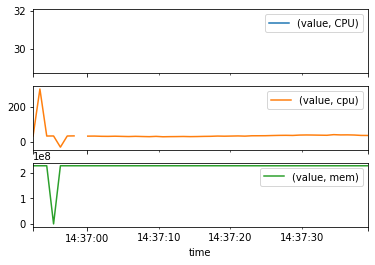

In [ ]:
pd.pivot(df, index = 'time', columns = 'name').plot(subplots = True)

In [ ]:
df.query('name == "cpu" & (value < 0 | value > 100)')

,time,name,value
3,2021-07-13 14:36:53.337,cpu,300.90
9,2021-07-13 14:36:56.208,cpu,-32.14


In [ ]:
mem = df[df['name']=='mem']['value']
z_score = (mem - mem.mean())/mem.std()
bad_mem = mem[z_score.abs()>2]
bad_mem

6    295.0
Name: value, dtype: float64

In [ ]:
df.loc[bad_mem.index]

,time,name,value
6,2021-07-13 14:36:55.251,mem,295.0
